In [1]:
import pandas as pd

Прочитаем данные о подписках Нетфликс

In [2]:
url='https://drive.google.com/file/d/1lhaVN62DqGvxgR6oEqSh1CXXC4_MB-wp/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
netflix = pd.read_csv(url)

In [3]:
netflix.sample(5)

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
9,Ecuador,4992,3155,1837,7.99,10.99,13.99
50,Hungary,6884,4802,2082,7.64,10.71,13.78
18,Iceland,6387,4426,1961,9.03,14.67,20.32
11,France,5445,3604,1841,10.16,15.24,20.32
36,Slovakia,7035,5055,1980,9.03,11.29,13.54


Переведем названия стран в верхний регистр и приведем названия колонок к удобному виду

In [4]:
netflix['Country'] = netflix['Country'].str.upper()
netflix.rename(columns = {
    'Total Library Size': 'Total_titles',
    'No. of TV Shows': 'Total_tvshows',
    'No. of Movies': 'Total_movies',
    'Cost Per Month - Basic ($)': 'Cost_basic',
    'Cost Per Month - Standard ($)': 'Cost_standart',
    'Cost Per Month - Premium ($)': 'Cost_premium',
    }, inplace = True)

Возьмем данные о средней зарплате (в долларах)

In [5]:
url = 'https://drive.google.com/file/d/1EpfeAiLz2A0TJ4Na2-egnODQPr3MP9TO/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
salaries = pd.read_csv(url)
salaries['Country'] = salaries['Country'].str.upper()
salaries.head(5)

,Country,Salary
0,AFGHANISTAN,172.00
1,ALBANIA,493.90
2,ARGENTINA,514.35
3,ARMENIA,238.32
4,AUSTRALIA,4467.33


Посомтрим, каких данных не хватает, добавим их вручную

In [6]:
netflix_x_salary = netflix.join(salaries.set_index('Country'), on='Country')
netflix_x_salary[netflix_x_salary.Salary.isnull()].Country

13        GIBRALTAR
17        HONG KONG
23    LIECHTENSTEIN
26          MOLDOVA
27           MONACO
30             PERU
34           RUSSIA
38      SOUTH KOREA
39           TAIWAN
44        VENEZUELA
54           CANADA
61      SWITZERLAND
Name: Country, dtype: object

In [7]:
add_salaries = {
    'Country' : ['GIBRALTAR', 'HONG KONG', 'LIECHTENSTEIN', 'MOLDOVA', 'MONACO', 'PERU', 'RUSSIA', 'SOUTH KOREA', 'TAIWAN', 'VENEZUELA', 'CANADA', 'SWITZERLAND'],
    'Salary' : [3011.13, 2015.26, 5480.0, 250.0, 6165.08, 520.36, 682.05, 3272.79, 1545.02, 699.0, 2785.79, 6270.82]
}
add_salaries_df = pd.DataFrame.from_dict(add_salaries)


In [8]:
new_salaries = pd.concat([salaries, add_salaries_df])
netflix_x_salary = netflix.join(new_salaries.set_index('Country'), on='Country')

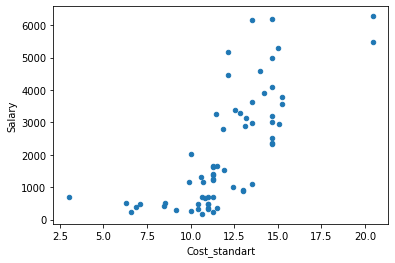

In [9]:
netflix_x_salary.plot.scatter(x='Cost_standart', y='Salary')

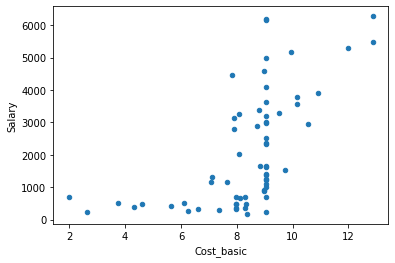

In [10]:
netflix_x_salary.plot.scatter(x='Cost_basic', y='Salary')

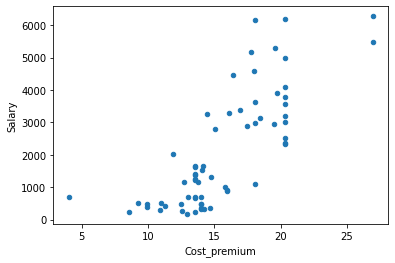

In [11]:
netflix_x_salary.plot.scatter(x='Cost_premium', y='Salary')

Теперь считаем таблицу с данными о валютах стран

In [12]:
url='https://drive.google.com/file/d/1OMV9Ay_AfP5QsDZ2SrqYMgJ2Kf8cpJya/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
currency = pd.read_csv(url)

In [13]:
currency.sample(10)

,Entity,Currency,NumericCode
55,CONGO (THE),CFA Franc BEAC,950.0
79,FALKLAND ISLANDS (THE) [MALVINAS],Falkland Islands Pound,238.0
110,ICELAND,Iceland Krona,352.0
12,ARUBA,Aruban Florin,533.0
123,JORDAN,Jordanian Dinar,400.0
223,SOUTH SUDAN,South Sudanese Pound,728.0
230,SWITZERLAND,Swiss Franc,756.0
147,MALI,CFA Franc BCEAO,952.0
103,HAITI,Gourde,332.0
196,ROMANIA,Romanian Leu,946.0


Нормализуем названия стран, убирая слова в скобках

In [14]:
currency.Entity = currency.Entity.apply(lambda x : x.split('(')[0].strip())

Соединим две таблицы и посмотрим, данных по каким странам нет

In [15]:
netflix_x_currency = netflix.join(currency.set_index('Entity'), on='Country')
netflix_x_currency[netflix_x_currency.Currency.isnull()].Country

34            RUSSIA
38       SOUTH KOREA
57    UNITED KINGDOM
64     UNITED STATES
Name: Country, dtype: object

Данные по этим странам добавим вручную

In [16]:
add_currency = {
    'Entity' : ['RUSSIA', 'SOUTH KOREA', 'UNITED KINGDOM', 'UNITED STATES'],
    'Currency' : ['Russian Ruble', 'Won', 'Pound Sterling', 'US Dollar'],
    'NumericCode' : [643, 410, 826, 840]
}
add_currency_df = pd.DataFrame.from_dict(add_currency)

In [17]:
new_currency = pd.concat([currency, add_currency_df])
netflix_x_currency = netflix.join(new_currency.set_index('Entity'), on='Country').drop(columns=['NumericCode'])

In [18]:
netflix_x_currency.groupby('Currency')[['Cost_basic', 'Cost_standart', 'Cost_premium']].mean().apply(lambda x : round(x, 3))

,Cost_basic,Cost_standart,Cost_premium
Currency,,,
Argentine Peso,3.740,6.300,9.260
Australian Dollar,7.840,12.120,16.390
Baht,8.340,10.430,12.520
Boliviano,7.990,10.990,13.990
Bolívar Soberano,7.990,10.990,13.990
Brazilian Real,4.610,7.110,9.960
Bulgarian Lev,9.030,11.290,13.540
Canadian Dollar,7.910,11.870,15.030
Chilean Peso,7.070,9.910,12.740


Примечание: так как некоторые страны имеют несколько официальных валют, они встречаются несколько раз и входят в группировку для каждой из этих валют

In [19]:
url = 'https://drive.google.com/file/d/1XJhOTnsHkmGoYP4vXFigFUgcsY_RwI63/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
continents = pd.read_csv(url)
continents['Country'] = continents['Country'].str.upper()

In [20]:
netflix_x_continents = netflix.join(continents.set_index('Country'), on='Country')
netflix_x_continents[netflix_x_continents.Continent.isnull()].Country

8           CZECHIA
13        GIBRALTAR
17        HONG KONG
34           RUSSIA
38      SOUTH KOREA
39           TAIWAN
64    UNITED STATES
Name: Country, dtype: object

In [21]:
add_continents = {
    'Continent' : ['Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Asia', 'Asia', 'North America'],
    'Country' : ['CZECHIA', 'GIBRALTAR', 'HONG KONG', 'RUSSIA', 'RUSSIA', 'SOUTH KOREA', 'TAIWAN', 'UNITED STATES']
}
add_continents_df = pd.DataFrame.from_dict(add_continents)

In [22]:
new_continents = pd.concat([continents, add_continents_df])
netflix_x_continents = netflix.merge(new_continents, how='left', on='Country')
netflix_x_continents.groupby('Continent')[['Cost_basic', 'Cost_standart', 'Cost_premium']].mean().apply(lambda x : round(x, 3))

,Cost_basic,Cost_standart,Cost_premium
Continent,,,
Africa,6.260,10.050,12.580
Asia,7.675,10.438,13.012
Europe,9.230,13.304,17.546
North America,8.082,11.877,15.205
Oceania,8.320,12.325,16.665
South America,6.709,9.619,12.555


In [23]:
netflix_x_salary['basic_ratio'] = netflix_x_salary.Cost_basic / netflix_x_salary.Salary * 100
netflix_x_salary['standart_ratio'] = netflix_x_salary.Cost_standart / netflix_x_salary.Salary * 100
netflix_x_salary['premium_ratio'] = netflix_x_salary.Cost_premium / netflix_x_salary.Salary * 100

In [24]:
netflix_x_salary[netflix_x_salary.Country == 'CZECHIA'][['basic_ratio', 'standart_ratio', 'premium_ratio']]

,basic_ratio,standart_ratio,premium_ratio
8,0.531957,0.692206,0.852456


In [25]:
netflix.sort_values(by=['Total_tvshows'], ascending=False).head(5).Country

8            CZECHIA
36          SLOVAKIA
3           BULGARIA
50           HUNGARY
57    UNITED KINGDOM
Name: Country, dtype: object

In [26]:
netflix_x_salary[netflix_x_salary.Country == 'RUSSIA'][['basic_ratio', 'standart_ratio', 'premium_ratio']]

,basic_ratio,standart_ratio,premium_ratio
34,1.191995,1.589326,1.988124


In [28]:
netflix_x_salary['cost_per_title_basic'] = netflix_x_salary.Cost_basic / netflix_x_salary.Total_titles
netflix_x_salary['cost_per_title_standart'] = netflix_x_salary.Cost_standart / netflix_x_salary.Total_titles
netflix_x_salary['cost_per_title_premium'] = netflix_x_salary.Cost_premium / netflix_x_salary.Total_titles

In [44]:
netflix_x_salary = netflix_x_salary.sort_values(by=['cost_per_title_basic']).reset_index(drop=True)
netflix_x_salary.index[netflix_x_salary.Country == 'RUSSIA'].to_list()

[25]

In [45]:
netflix_x_salary = netflix_x_salary.sort_values(by=['cost_per_title_standart']).reset_index(drop=True)
netflix_x_salary.index[netflix_x_salary.Country == 'RUSSIA'].to_list()

[17]

In [46]:
netflix_x_salary = netflix_x_salary.sort_values(by=['cost_per_title_premium']).reset_index(drop=True)
netflix_x_salary.index[netflix_x_salary.Country == 'RUSSIA'].to_list()

[17]

Видим, что Россия на 25, 17, 17 местах с сортировкой по базовой, стандартной и премиум подписках соответственно

In [53]:
netflix_x_salary.sort_values(by=['cost_per_title_basic']).head(5)

,Country,Total_titles,Total_tvshows,Total_movies,Cost_basic,Cost_standart,Cost_premium,Salary,basic_ratio,standart_ratio,premium_ratio,cost_per_title_basic,cost_per_title_standart,cost_per_title_premium
0,TURKEY,4639,2930,1709,1.97,3.00,4.02,706.53,0.278828,0.424610,0.568978,0.000425,0.000647,0.000867
1,INDIA,5843,3718,2125,2.64,6.61,8.60,222.53,1.186357,2.970386,3.864647,0.000452,0.001131,0.001472
5,ARGENTINA,4760,3154,1606,3.74,6.30,9.26,514.35,0.727131,1.224847,1.800331,0.000786,0.001324,0.001945
6,COLOMBIA,4991,3156,1835,4.31,6.86,9.93,398.07,1.082724,1.723315,2.494536,0.000864,0.001374,0.001990
9,BRAZIL,4972,3162,1810,4.61,7.11,9.96,493.00,0.935091,1.442191,2.020284,0.000927,0.001430,0.002003


In [54]:
netflix_x_salary.sort_values(by=['cost_per_title_standart']).head(5)

,Country,Total_titles,Total_tvshows,Total_movies,Cost_basic,Cost_standart,Cost_premium,Salary,basic_ratio,standart_ratio,premium_ratio,cost_per_title_basic,cost_per_title_standart,cost_per_title_premium
0,TURKEY,4639,2930,1709,1.97,3.00,4.02,706.53,0.278828,0.424610,0.568978,0.000425,0.000647,0.000867
1,INDIA,5843,3718,2125,2.64,6.61,8.60,222.53,1.186357,2.970386,3.864647,0.000452,0.001131,0.001472
5,ARGENTINA,4760,3154,1606,3.74,6.30,9.26,514.35,0.727131,1.224847,1.800331,0.000786,0.001324,0.001945
6,COLOMBIA,4991,3156,1835,4.31,6.86,9.93,398.07,1.082724,1.723315,2.494536,0.000864,0.001374,0.001990
9,BRAZIL,4972,3162,1810,4.61,7.11,9.96,493.00,0.935091,1.442191,2.020284,0.000927,0.001430,0.002003


In [55]:
netflix_x_salary.sort_values(by=['cost_per_title_premium']).head(5)

,Country,Total_titles,Total_tvshows,Total_movies,Cost_basic,Cost_standart,Cost_premium,Salary,basic_ratio,standart_ratio,premium_ratio,cost_per_title_basic,cost_per_title_standart,cost_per_title_premium
0,TURKEY,4639,2930,1709,1.97,3.00,4.02,706.53,0.278828,0.424610,0.568978,0.000425,0.000647,0.000867
1,INDIA,5843,3718,2125,2.64,6.61,8.60,222.53,1.186357,2.970386,3.864647,0.000452,0.001131,0.001472
2,PHILIPPINES,6362,4154,2208,7.35,9.14,10.93,308.80,2.380181,2.959845,3.539508,0.001155,0.001437,0.001718
3,SLOVAKIA,7035,5055,1980,9.03,11.29,13.54,1412.78,0.639165,0.799134,0.958394,0.001284,0.001605,0.001925
4,CZECHIA,7325,5234,2091,8.83,11.49,14.15,1659.91,0.531957,0.692206,0.852456,0.001205,0.001569,0.001932


По показателю cost per title выгоднее всего брать подписку через Турцию. Но стоит рассмотреть все варианты топ-5, так как среди них у Турции самый маленький выбор. По этим показателям стоит расммотреть так же Словакию и Чехию.